In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
file='S02-hw-dataset.csv'
data = pd.read_csv(file, sep=',')
data



,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [3]:
data.head(10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [7]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [20]:
missing = data.isna().mean()

duplicates = data[data.duplicated()]

suspicious = {}
suspicious['negative_values'] = data[(data[['age','purchases','revenue']] < 0).any(axis=1)]

suspicious['age_over_100'] = data[data['age'] > 100]
suspicious['zero_revenue_with_purchases'] = data[(data['revenue'] == 0) & (data['purchases'] > 0)]
print(missing)
print(duplicates)
print(suspicious)


user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64
    user_id   age country  purchases  revenue
40       10  24.0      RU          7      511
{'negative_values':    user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785, 'age_over_100':    user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785, 'zero_revenue_with_purchases':     user_id   age country  purchases  revenue
10       11  24.0      US          4        0}


2025-12-07 18:31:12,976 - INFO     - Executing shutdown due to inactivity...
2025-12-07 18:31:12,988 - INFO     - Executing shutdown...
2025-12-07 18:31:12,990 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


Есть пропуски и дубликаты. Есть невозможный возраст и отрицательные покупки,нулевой доход при ненулевых покупках

In [21]:
file='Video_Games_Sales_as_at_22_Dec_2016.csv'
data = pd.read_csv(file, sep=',')
data


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:

result = (
    data.groupby("Genre")
      .agg(
          Avg_Global_Sales=("Global_Sales", "mean"),
          Total_Games=("Name", "count"),
          Avg_Critic_Score=("Critic_Score", "mean")
      )
      .sort_values("Avg_Global_Sales", ascending=False)
)

print(result)
#средние глобальные продажи по жанрам и количество игр в каждом жанре

              Avg_Global_Sales  Total_Games  Avg_Critic_Score
Genre                                                        
Platform              0.932523          888         68.058350
Shooter               0.795873         1323         70.181144
Role-Playing          0.622933         1500         72.652646
Racing                0.583587         1249         67.963612
Sports                0.567291         2348         71.968174
Fighting              0.527067          849         69.217604
Action                0.517884         3370         66.629101
Misc                  0.458960         1750         66.619503
Simulation            0.446705          874         68.619318
Puzzle                0.419000          580         67.424107
Strategy              0.255490          683         72.086093
Adventure             0.182417         1303         65.331269


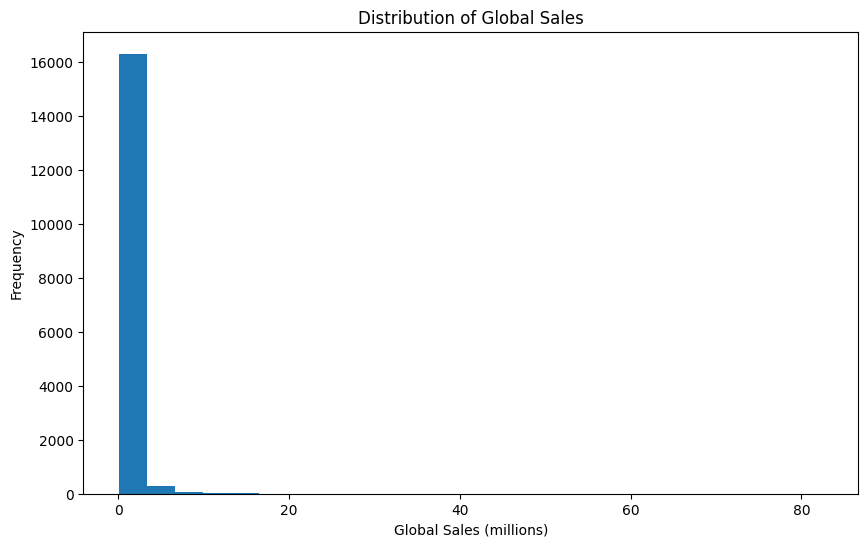

In [33]:
plt.figure(figsize=(10, 6))

plt.hist(data["Global_Sales"], bins=25)  

plt.xlabel("Global Sales (millions)")
plt.ylabel("Frequency")
plt.title("Distribution of Global Sales")

plt.savefig("figures/global_sales_histogram.png", dpi=300, bbox_inches="tight")

plt.show()


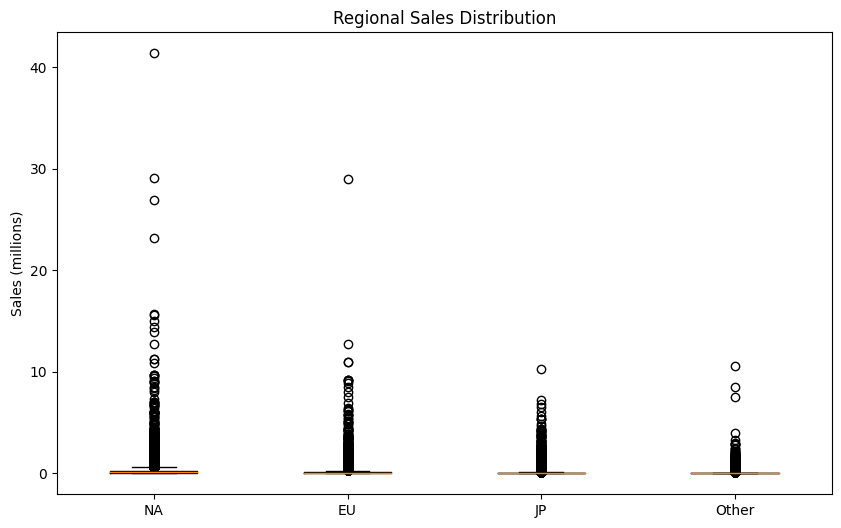

In [36]:
plt.figure(figsize=(10, 6))

plt.boxplot([
    data["NA_Sales"].dropna(),
    data["EU_Sales"].dropna(),
    data["JP_Sales"].dropna(),
    data["Other_Sales"].dropna()
])

plt.xticks([1, 2, 3, 4], ["NA", "EU", "JP", "Other"])
plt.ylabel("Sales (millions)")
plt.title("Regional Sales Distribution")

plt.show()



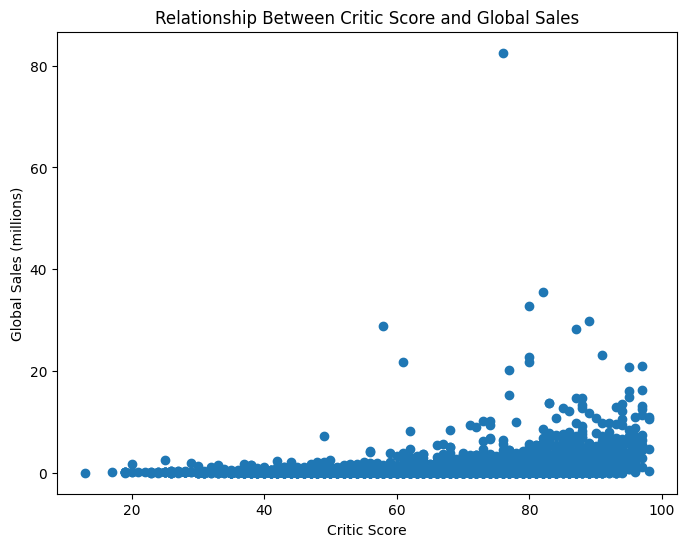

In [38]:
plt.figure(figsize=(8, 6))

plt.scatter(data["Critic_Score"], data["Global_Sales"])

plt.xlabel("Critic Score")
plt.ylabel("Global Sales (millions)")
plt.title("Relationship Between Critic Score and Global Sales")

plt.show()
